# Data Preprocessing

Data preprocessing and cleaning are critical steps to ensure data quality and reliability. This process involves handling missing values, removing duplicates, correcting errors, and dealing with outliers. Our goal is to enhance the accuracy, integrity, and robustness of any insights or predictions derived from the data by the preprocessing methods.

In [ ]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
dataDiabetes= pd.read_csv('Dataset/Diabetes.csv')
df=pd.DataFrame(dataDiabetes)

##Missing data

Presenting an efficient way to inspect a DataFrame for missing values and identify which columns contain missing data, along with the number of missing values in each column, as shown below. In this example, our dataset does not contain any missing values.

In [ ]:
missing_values= df.isna().sum() #calculates the number of missing values for each column in the DataFrame
print("The missing data in each column:")
print(missing_values)

The missing data in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


##Duplicated data

To maintain data integrity and accuracy, it is important to check for and remove duplicate rows in a DataFrame. This process involves scanning for identical rows and removing them if found, ensuring a clean dataset for analysis. If no duplicates are detected, the code confirms this. In this case, the code indicates that our data does not have any duplicated values, as shown below.

In [ ]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

if not duplicated_rows.empty:
    print("There is Duplicated rows data found! Removing duplicates")

else:
    print("There is No duplicated rows data found.")

There is No duplicated rows data found.


##Clean and Standardize data

To ensure accurate data analysis, it is important to remove any extra spaces in string values and capitalize characters in categorical variables like 'Gender' entered by users, as they can cause inconsistencies, such as misidentifying duplicates or grouping errors. Cleaning these spaces and capitalizing categorical values enhances the clarity and accuracy of the analysis; therefore, we implemented the code below to efficiently remove spaces from the string values and convert all letters in the 'Gender' column to uppercase.

In [ ]:
# Remove spaces in the specific column and capitalize the letters in 'Gender'
df['CLASS'] = df['CLASS'].str.replace(' ', '', regex=False)
df['Gender'] = df['Gender'].str.replace(' ', '', regex=False).str.upper()

print("The Clean and Standardize data:")
print(df)

The Clean and Standardize data:
      ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0

## Detecting and Removing outliers

Determine and remove outliers from numeric columns of a DataFrame using the Interquartile Range (IQR) to enhance data quality and consistency during the preprocessing and cleaning stages

In [ ]:
# Detect and remove outliers
outlier_threshold = 1.5

def identify_outliers(column_df):
    q1 = np.percentile(column_df, 25)
    q3 = np.percentile(column_df, 75)
    iqr = q3 - q1
    return (column_df < q1 - outlier_threshold * iqr) | (column_df > q3 + outlier_threshold * iqr)

numeric_columns = ['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']

def remove_outliers(df):
    total_outliers_removed = 0  # Variable to keep track of total outliers removed
    # Loop to check and remove all outliers
    for _ in range(10):
        outlier_selection = np.any([identify_outliers(df[col]) for col in numeric_columns], axis=0)
        if not outlier_selection.any():
            break
        total_outliers_removed += outlier_selection.sum()
        df = df[~outlier_selection].copy()
    return df, total_outliers_removed  # Return the cleaned DataFrame and the total outliers removed

print(f"Original rows: {len(df)}")
df, total_outliers_removed = remove_outliers(df)
print(f"Removing {total_outliers_removed} outliers")
print(f"Rows after removing outliers: {len(df)}")

Original rows: 1000
Removing 292 outliers
Rows after removing outliers: 708


##Encoding

We encoded the 'Gender' column to convert categorical data into numerical format, with 'M' as 1 and 'F' as 0, allowing for easier analysis. This ensures that classification tasks can be performed accurately and efficiently.

In [ ]:
#Encoding


le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender']) # M = 1 , F = 0

print("Encoding categorical data:")
print(df)

Encoding categorical data:
      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
5    634      34224       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4   
6    721      34225       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6   
7    421      34227       1   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
990  194     454316       0   57   4.1  70    9.3   5.3  3.3  1.0  1.4   1.3   
991  195       4543       0   55   4.1  34   13.9   5.4  1.6  1.6  3.1   0.7   
992  196     454316       1   55   3.1  39    8.5   5.0  2.5  1.9  2.9   0.7   
993  198     454316       1   28   3.5  61    8.5   4.5  1.9  1.1  2.6   0.8   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CL

## Balancing data

 The goal of balancing data is to improve the model's ability to make accurate predictions across all classes. The code calculates and displays the percentage frequency of each unique class in the CLASS column of a dataset and from the result of the code we detect that the data balance does not have a closely equal percentage so we have an imbalanced dataset.

In [ ]:

#calculate the frequancy for each type in  the class label
class_frequency = df['CLASS'].value_counts(normalize=True)*100

print("The percentage of each type in the class lable\n" +class_frequency.to_string())

The percentage of each type in the class lable
CLASS
Y    82.485876
N    10.593220
P     6.920904


##Normalization

Normalization is crucial for our diabetes dataset as it ensures that all features are on a similar scale, which helps machine learning models learn more effectively. By scaling the data, we reduce the influence of larger numerical values and improve the model's performance and convergence speed. This consistency makes it easier to interpret feature importance and ultimately leads to better predictions regarding diabetes outcomes.

In [ ]:

#select only numirical column
columns_to_normalize = ['Urea', 'Cr', 'BMI', 'HbA1c','TG','HDL','LDL','VLDL','Chol']

# Select the data to normalize
data_to_normalize = df[columns_to_normalize]

# Z-score normalization for selected columns
zscore_scaler = StandardScaler()
normalized_data_zscore = zscore_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original dataframe
df[columns_to_normalize] = normalized_data_zscore

print("The z-score normalized data:")
print(df)

The z-score normalized data:
      ID  No_Pation  Gender  AGE      Urea        Cr     HbA1c      Chol  \
1    735      34221       1   26  0.031916  0.211193 -1.296987 -0.981598   
4    504      34223       1   33  1.920990 -0.725166 -1.296987  0.127251   
5    634      34224       0   45 -1.566532 -2.012660 -1.656221 -1.720831   
6    721      34225       0   50 -1.784502 -0.491076 -1.656221 -1.074002   
7    421      34227       1   48  0.177229 -0.666644 -1.656221 -1.720831   
..   ...        ...     ...  ...       ...       ...       ...       ...   
990  194     454316       0   57 -0.258711  0.679373  0.459270  0.496868   
991  195       4543       0   55 -0.258711 -1.427436  2.295356  0.589272   
992  196     454316       1   55 -0.985278 -1.134823  0.139950  0.219656   
993  198     454316       1   28 -0.694651  0.152671  0.139950 -0.242365   
999  248      24054       1   54  0.395199  0.503806 -0.498688 -0.889194   

           TG       HDL       LDL      VLDL       BMI CLAS

##Aggregation

In aggregation we grouped the data based on the "Gender" column and applied the "mean" function. This will give us the mean values for the ( 'Cr' , 'HbA1c' , 'Chol' , 'TG' , 'HDL' , 'LDL' , 'VLDL' , 'BMI' ) columns for both male and female patients. Aggregation will help us derive insights from the data by summarizing it.

In [ ]:
#Aggregation

avg = df.groupby('Gender')[['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']].agg('mean')

print("Average data by Gender:")
print(avg)

Average data by Gender:
            Urea        Cr       BMI     HbA1c        TG       HDL       LDL  \
Gender                                                                         
0      -0.254736 -0.396800 -0.031901  0.052914 -0.017795  0.120641 -0.002254   
1       0.221130  0.344452  0.027692 -0.045933  0.015447 -0.104726  0.001956   

            VLDL      Chol  
Gender                      
0       0.008982  0.048329  
1      -0.007797 -0.041953  


##Discretization

Discretization is applied to the "AGE" column to convert it into categorical age groups:

20 - 34 Years = "Young Adults"

35 - 54 Years = "Middle-aged Adults"

55 - 79 Years = "Older Adults"

The ranges were set dependeing on the values we have in our dataset. this transformation helps prepare the data for certain machine learning algorithms that require categorical features or for easier analysis in a more interpretable format.

In [ ]:
# Discretization code

lAge = ['Young Adults', 'Middle-aged Adults', 'Older Adults']

df['AGE']= pd.cut(df['AGE'], bins=3, labels=lAge)

print("The Discretized data:")
print(df)

The Discretized data:
      ID  No_Pation  Gender                 AGE      Urea        Cr     HbA1c  \
1    735      34221       1        Young Adults  0.031916  0.211193 -1.296987   
4    504      34223       1        Young Adults  1.920990 -0.725166 -1.296987   
5    634      34224       0  Middle-aged Adults -1.566532 -2.012660 -1.656221   
6    721      34225       0  Middle-aged Adults -1.784502 -0.491076 -1.656221   
7    421      34227       1  Middle-aged Adults  0.177229 -0.666644 -1.656221   
..   ...        ...     ...                 ...       ...       ...       ...   
990  194     454316       0  Middle-aged Adults -0.258711  0.679373  0.459270   
991  195       4543       0  Middle-aged Adults -0.258711 -1.427436  2.295356   
992  196     454316       1  Middle-aged Adults -0.985278 -1.134823  0.139950   
993  198     454316       1        Young Adults -0.694651  0.152671  0.139950   
999  248      24054       1  Middle-aged Adults  0.395199  0.503806 -0.498688   

     

##Feature selection

We aim to select the best 10 features, excluding the id ,gender and CLASS columns, because research indicates that having around 10 attributes is generally sufficient to accurately predict diabetes outcomes. This selection will help us build a robust model that can effectively identify and classify diabetes risk based on relevant features in the dataset.

In [ ]:
#Feature selection

print("Column names in the dataset:")
print(df.columns)
#converts the categorical variable Class into a numerical format. LabelEncoder transforms the string labels into integers
label_encoder = LabelEncoder()
df['CLASS_encoded'] = label_encoder.fit_transform(df['CLASS'])

#exclude the column that we want to predict and the coded version , catigoral column , unique identifier
X = df.drop(columns=['CLASS', 'CLASS_encoded','Gender','ID','AGE'] )
#the encoded target variable
y = df['CLASS_encoded']

# Calculate the correlation coefficients between numerical features and target variable
correlation_values = np.abs(X.corrwith(y))
#This sorts the correlation values in descending order,
correlation_values.sort_values(ascending=False, inplace=True)
# selects the top k features
k = 10
#selected_feature_names will contain the names of the top 10 features with the strongest correlation to the target variable.
selected_feature_names = correlation_values.head(k).index.tolist()

# Create the DataFrame with selected features including the target variable
df_selected = df[['CLASS','ID'] + selected_feature_names]
#prints the names of the selected features based on their correlation with CLASS
print("Selected Features based on Correlation:")
print(selected_feature_names)



Column names in the dataset:
Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
Selected Features based on Correlation:
['BMI', 'HbA1c', 'TG', 'VLDL', 'Chol', 'Urea', 'LDL', 'Cr', 'HDL', 'No_Pation']


In [ ]:
#save the modified dataframe to new csv file
df_selected.to_csv('DataDiabetes.csv',index=False)

# Summary of the data set:

In this section, we will provide an overview of the dataset by showcasing a quick summary. This will include a sample of the data rows, as well as visualizations such as graphs and tables, along with statistical summaries. To begin, we must first import the dataset to ensure it is available for analysis and visualization.


In [ ]:
dataDiabetes = df_selected

## data description:

In our dataset includes a detailed explanation of the attributes along with their corresponding types. After data preprocessing, the dataset contains the same 14 columns, each representing unique features relevant to a specific context. To enhance clarity, we define the type of each attribute, ensuring a transparent view of the data structure and enabling smooth analysis.








In [ ]:
from IPython.display import display, HTML

html_content = """
<table style="border:1;">
  <thead>
    <tr>
      <th>No</th>
      <th>Name</th>
      <th>Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>ID</td>
      <td>Nominal and Integer</td>
      <td>ID number that distinguishes different samples/data that have been taken from different patients</td>
    </tr>
    <tr>
      <td>2</td>
      <td>No_Patient</td>
      <td>Numeric and Integer</td>
      <td> patient number </td>
    </tr>
    <tr>
      <td>3</td>
      <td>Gender</td>
      <td>Binary </td>
      <td> Gender type </td>
    </tr>
    <tr>
      <td>4</td>
      <td>Age</td>
      <td>Numeric and Integer</td>
      <td>The age of the patient</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Urea</td>
      <td>Numeric and Float</td>
      <td>Urea is a waste product formed in the liver when the body breaks down proteins</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Cr</td>
      <td>Numeric and Integer</td>
      <td> refers to the ratio of creatinine levels in the body</td>
    </tr>
    <tr>
      <td>7</td>
      <td>HbA1c</td>
      <td>Numeric and Float</td>
      <td>The HbA1c (Hemoglobin A1c) attribute represents the average blood glucose (sugar) levels </td>
    </tr>
    <tr>
      <td>8</td>
      <td>Chol</td>
      <td>Numeric and Float</td>
      <td>The Chol attribute refers to the total cholesterol level in the blood </td>
    </tr>
    <tr>
      <td>9</td>
      <td>TG</td>
      <td>Numeric and Float</td>
      <td>The TG attribute measures the level of triglycerides in the blood</td>
    </tr>
    <tr>
      <td>10</td>
      <td>HDL</td>
      <td>Numeric and Float</td>
      <td>The HDL(High-Density Lipoprotein) refers to a type of cholesterol often termed "good cholesterol" because it helps remove excess cholesterol from the bloodstream</td>
    </tr>
    <tr>
      <td>11</td>
      <td>LDL</td>
      <td>Numeric and Float</td>
      <td>The LDL (Low-Density Lipoprotein) attribute refers to a type of cholesterol that is often termed "bad" cholesterol</td>
    </tr>
    <tr>
      <td>12</td>
      <td>VLDL </td>
      <td>Numeric and Float</td>
      <td>VLDL (Very Low-Density Lipoprotein) is a type of lipoprotein produced by the liver</td>
    </tr>
    <tr>
      <td>13</td>
      <td>BMI </td>
      <td>Numeric and Float</td>
      <td>Body Mass Index</td>
    </tr>
     <tr>
      <td>14</td>
      <td>CLASS </td>
      <td>Ordinal</td>
      <td>Class (the patient's diabetes disease class may be Diabetic 'Y', Non-Diabetic 'N", or Predict-Diabetic 'P').</td>
    </tr>

  </tbody>
</table>
"""

# Display the HTML content
display(HTML(html_content))


No,Name,Type,Description
1,ID,Nominal and Integer,ID number that distinguishes different samples/data that have been taken from different patients
2,No_Patient,Numeric and Integer,patient number
3,Gender,Binary,Gender type
4,Age,Numeric and Integer,The age of the patient
5,Urea,Numeric and Float,Urea is a waste product formed in the liver when the body breaks down proteins
6,Cr,Numeric and Integer,refers to the ratio of creatinine levels in the body
7,HbA1c,Numeric and Float,The HbA1c (Hemoglobin A1c) attribute represents the average blood glucose (sugar) levels
8,Chol,Numeric and Float,The Chol attribute refers to the total cholesterol level in the blood
9,TG,Numeric and Float,The TG attribute measures the level of triglycerides in the blood
10,HDL,Numeric and Float,"The HDL(High-Density Lipoprotein) refers to a type of cholesterol often termed ""good cholesterol"" because it helps remove excess cholesterol from the bloodstream"


## Sample of data:

 We going to display the first 5 row as a sample of the preprocessed data using the following code:

In [ ]:
from IPython.display import display, HTML  # Import the HTML class so we can display the table

#print sample of 1st 5
print('The first 5 rows of the raw data:')
data_sample = dataDiabetes.head(5)
# Generate HTML code from the sample
sample_table = data_sample.to_html(index=False)
# Display the HTML table in the notebook
display(HTML(sample_table))

The first 5 rows of the raw data:


CLASS,ID,BMI,HbA1c,TG,VLDL,Chol,Urea,LDL,Cr,HDL,No_Pation
N,735,-1.274206,-1.296987,-0.704914,-0.847649,-0.981598,0.031916,-0.518220,0.211193,-0.044327,34221
N,504,-1.697288,-1.296987,-1.157491,-1.321316,0.127251,1.920990,-0.619716,-0.725166,-1.002115,34223
N,634,-1.697288,-1.656221,-1.157491,-1.321316,-1.720831,-1.566532,-1.127198,-2.012660,-0.363590,34224
N,721,-1.062665,-1.656221,-0.818059,-0.847649,-1.074002,-1.784502,-0.518220,-0.491076,-0.682852,34225
N,421,-1.062665,-1.656221,-1.383780,-1.321316,-1.720831,0.177229,-1.025702,-0.666644,-0.682852,34227


# Visulaization

We decided to present our data through graphical formats enhances both the clarity and efficiency of data analysis and reporting. Several types of charts were employed to effectively communicate insights and trends, including the following:

pie chart is used to display the percentage distribution of diagnoses and ages in our dataset. in the diagnoses it shows that 82.5% of the cases were Y ,10.6% were N and 6.9% were P. also in the Age it shows that 68.1% were Middle-aged Adults, 23.3% were Older Adults and 8.6% were Young Adults.

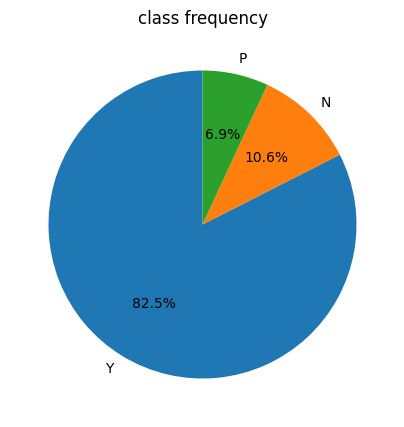

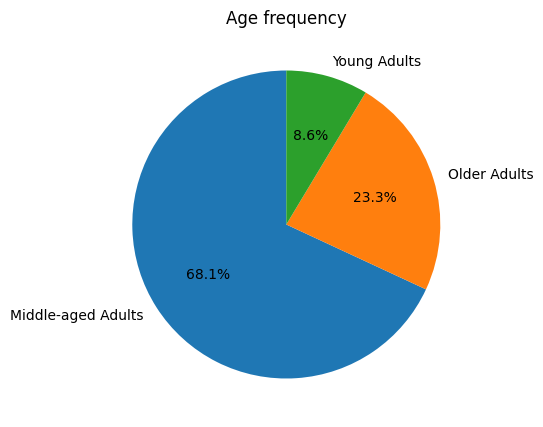

In [ ]:
# graphs and tables show variable distribution , missing values:
import matplotlib.pyplot as plt
#calculate the frequancy for each Class :
Class_frequency = df['CLASS'].value_counts(normalize=True)*100

#plot a pie chart
Class_frequency.plot.pie(autopct='%1.1f%%',figsize=(5,5),startangle=90)

#display the plot with appropriate apperance by changing the values of the attribute
plt.title('class frequency')
plt.ylabel('')
plt.show()

#calculate the frequancy for each Class :
Age_frequency = df['AGE'].value_counts(normalize=True)*100

#plot a pie chart
Age_frequency.plot.pie(autopct='%1.1f%%',figsize=(5,5),startangle=90)

#display the plot with appropriate apperance by changing the values of the attribute
plt.title('Age frequency')
plt.ylabel('')
plt.show()

We used a box plots graph to visualize the distribution of variables for each attribute and to compare values across different classes, providing insights into variability and potential outliers that After removing extreme outliers the overall distribution of the data  Caused some points that were not previously considered as outliers to be flagged as outliers.



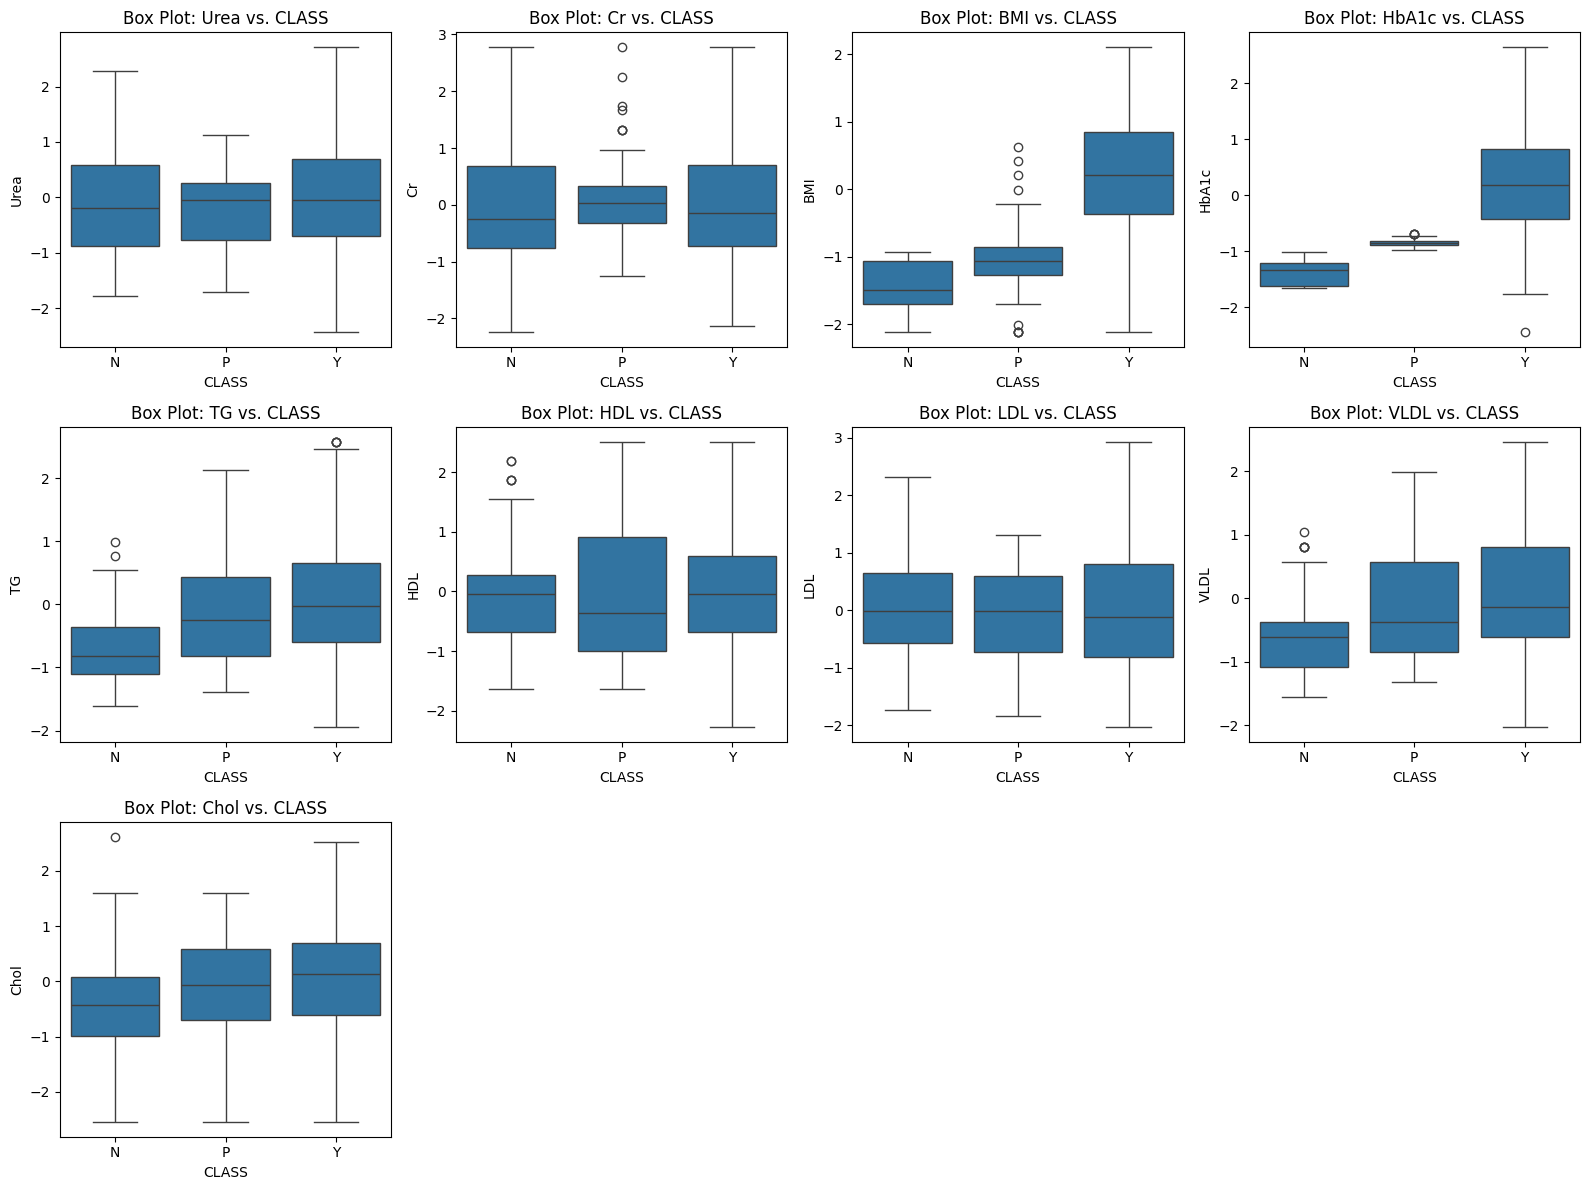

In [ ]:
#this is to solve the problem of "ModuleNotFoundError: No module named ‘seabor’"
%pip install seaborn
import seaborn as sns

target_column= 'CLASS'

# choosing the numiric data only
numeric_columns = ['Urea', 'Cr', 'BMI', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'Chol']

# Determine the number of rows and columns for the subplot layout
num_features = len(numeric_columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(4, num_features)

# Create box plots for each feature grouped by 'Class'
plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=target_column, y=feature, data=df)
    plt.title(f'Box Plot: {feature} vs. {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Most of our data is numerical, and an ideal method for visualizing these relationships is through a scatter plot matrix (pair plot). This allows for a comprehensive view of how variables interact with one another

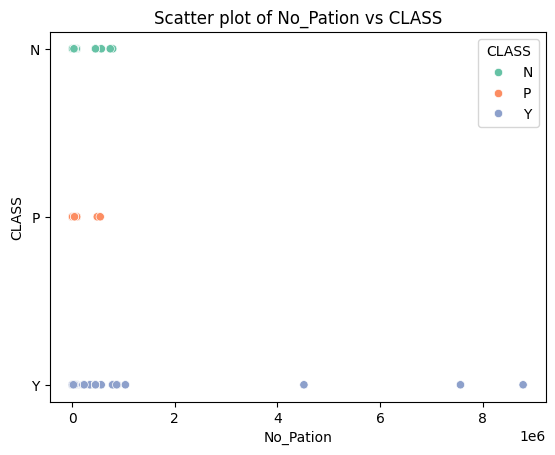

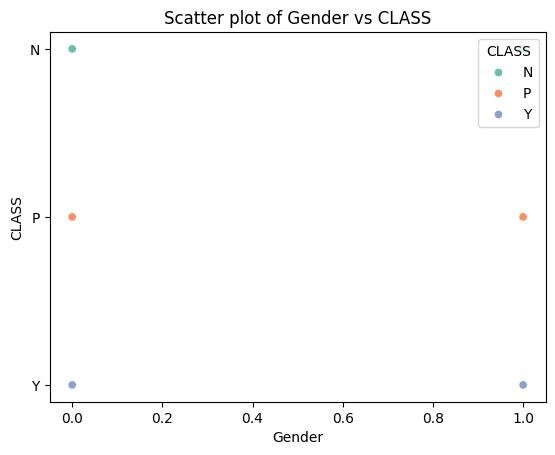

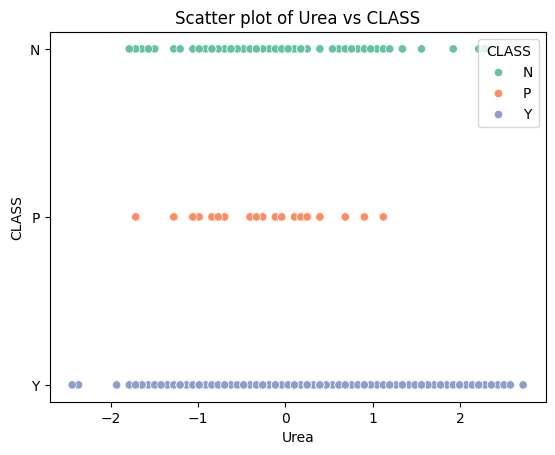

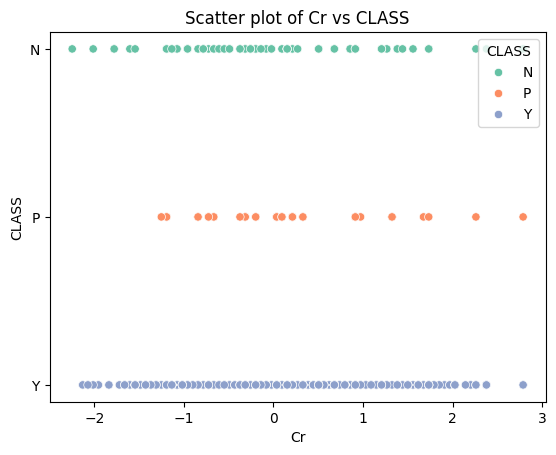

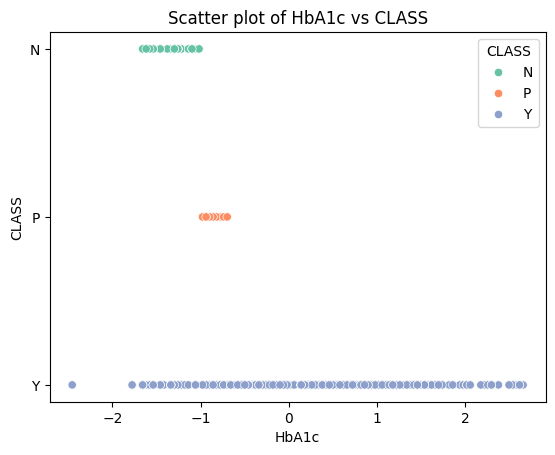

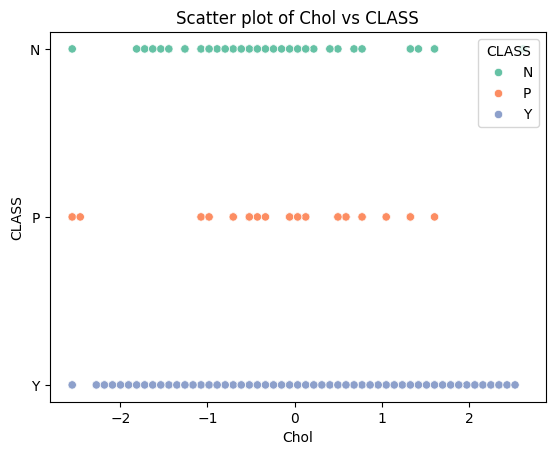

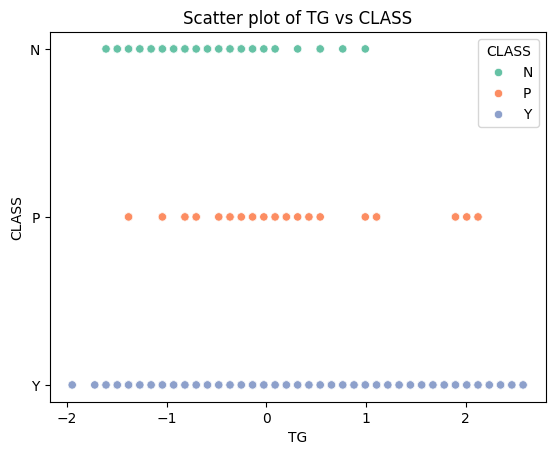

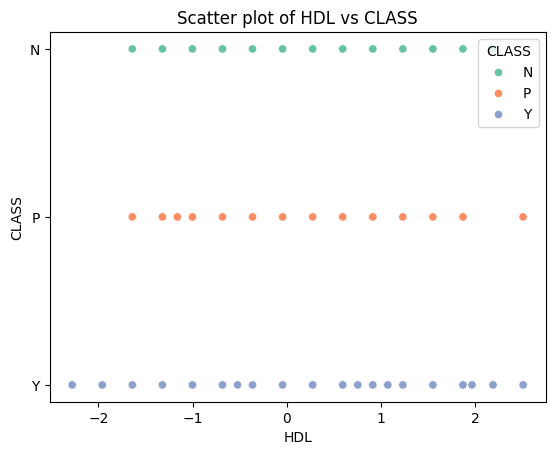

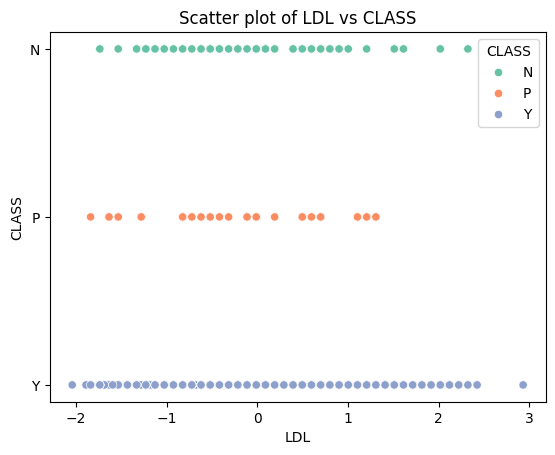

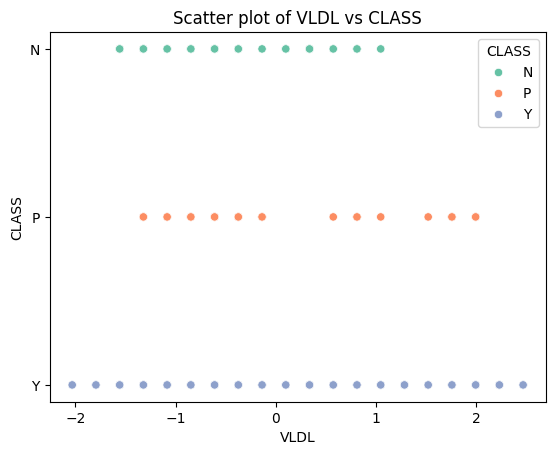

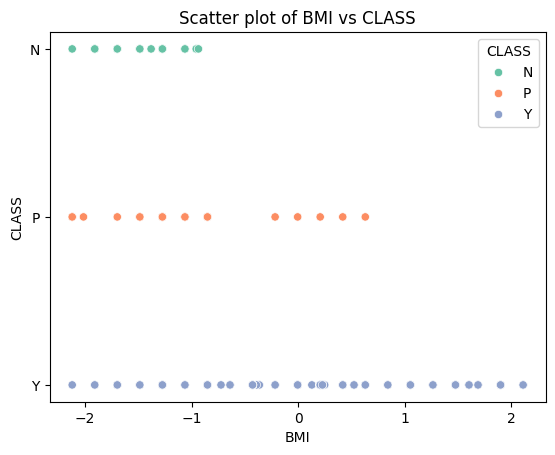

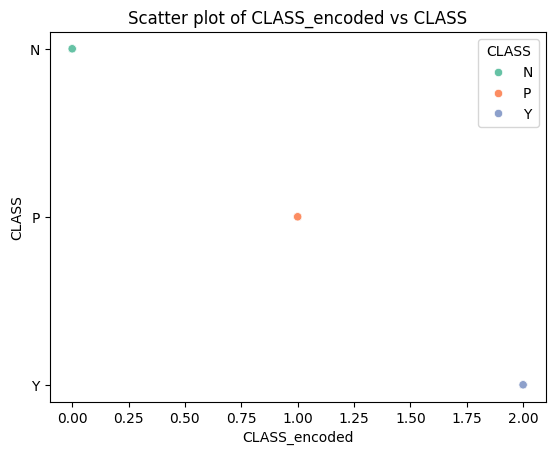

In [ ]:
# Exclude the 'ID','AGE' and 'CLASS' columns
selected_features = df.drop(columns=['ID', 'AGE','CLASS'])

# Create scatter plots for each attribute against the target variable 'Gender'
for column in selected_features.columns:
    sns.scatterplot(data=df, x=column, y='CLASS', hue='CLASS', palette='Set2')
    plt.title(f"Scatter plot of {column} vs CLASS")
    plt.xlabel(column)
    plt.ylabel('CLASS')
    plt.legend(title='CLASS', loc='upper right')
    plt.show()

We selected histograms to visualize our data because they effectively represent the distribution of our predominantly numerical dataset.



array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'No_Pation'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Urea'}>],
       [<Axes: title={'center': 'Cr'}>,
        <Axes: title={'center': 'HbA1c'}>,
        <Axes: title={'center': 'Chol'}>, <Axes: title={'center': 'TG'}>],
       [<Axes: title={'center': 'HDL'}>, <Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'VLDL'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'CLASS_encoded'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

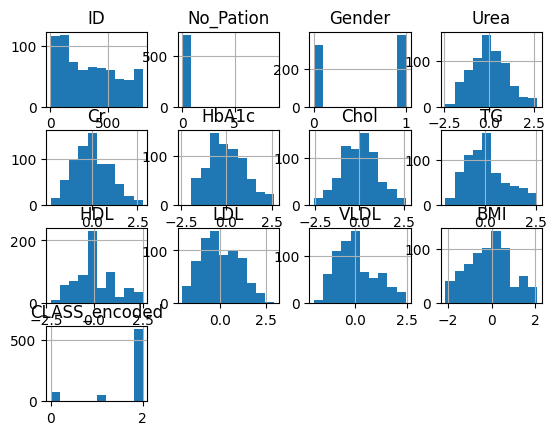

In [ ]:
df.hist()

##Statistical summary

It's important to take a look at the statistic summary to capture the different characteristics of our data set, such as the central tendency measurement and the variance. The table below shows these measurements that have been calculated by the python code above it.

In [ ]:
import statistics as st
from IPython.display import display, HTML


# Selecting the feature columns for statistical summary, excluding categorical columns like 'Gender' and 'CLASS'
feature_columns = [ 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

summary_data = []

# Loop through each feature column and calculate statistics
for columnName in feature_columns:
    columnData = df[columnName]
    midrange = (max(columnData) + min(columnData))/2
    summary_data.append({
        'Feature': columnName,
        'Mean': st.mean(columnData),
        'Median': st.median(columnData),
        'Mode': st.mode(columnData),
        'Midrange': midrange,
        'Variance': st.variance(columnData)
    })

# Create a DataFrame to hold the summary statistics
statistical_summaries = pd.DataFrame(summary_data)

# Generate HTML code from the DataFrame
statistical_summaries_table = statistical_summaries.to_html(index=False)

# Display the HTML table
display(HTML(statistical_summaries_table))


Feature,Mean,Median,Mode,Midrange,Variance
Urea,-3.549323e-16,-0.040741,-0.331368,0.140901,1.001414
Cr,1.625936e-17,-0.139941,-0.139941,0.269716,1.001414
HbA1c,-2.837302e-16,-0.099539,-1.656221,0.100035,1.001414
Chol,2.843084e-16,0.034847,-0.334769,0.034847,1.001414
TG,-2.820151e-16,-0.026049,0.087096,0.313384,1.001414
HDL,-1.796076e-16,-0.044327,-0.363590,0.115304,1.001414
LDL,1.688464e-16,-0.112234,-0.112234,0.445997,1.001414
VLDL,-5.017957e-17,-0.137149,-0.137149,0.218101,1.001414
BMI,1.441107e-16,-0.004960,0.206581,-0.004960,1.001414
